# Classification  
We use features, and a classifier, to predict categorical variables.  

### Steps in doing Classification
1. Import Packages
2. Load dataset  and set X and y
3. Train-test Split  
4. Descriptive and Prescriptive Analytics on Train Set  
5. Predictive Analytics from Train Set to Test Set  
6. Metrics (accuracy, confusion matrix)  
7. Explain Results  

# 1. Import Packages

In [ ]:
# IMPORT GENERIC PACKAGES
import numpy as np # numerical calc package
import pandas as pd # holds data
import matplotlib.pyplot as plt # plotting library
import seaborn as sns # pretty plotting

sns.set(rc={'figure.figsize':(20,10)})

from sklearn.model_selection import train_test_split # split dataset
from sklearn.linear_model import LogisticRegression # linear model for classification
from sklearn.metrics import confusion_matrix

# 2. Load Data

In [ ]:
data = pd.read_csv('advertising_classification.csv')

In [ ]:
data.head(5)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


### Dataset Description  

We want to predict if the person clicked on the ad based on features such as:  

- daily time spent on site
- area income
- daily internet usage

In [ ]:
# write list of features we want to use
features = ["Daily Time Spent on Site", 'Area Income', "Age"]

# Set X
X = data[features]

In [ ]:
X.head()

,Daily Time Spent on Site,Area Income,Age
0,68.95,61833.90,35
1,80.23,68441.85,31
2,69.47,59785.94,26
3,74.15,54806.18,29
4,68.37,73889.99,35


In [ ]:
# write list of features we want to use
features = ["Daily Time Spent on Site", 'Area Income', "Age"]

# Set X
X_temp = data[features]


# Convert text to numeric
X = pd.get_dummies(X_temp)

# Set y
y = data["Clicked on Ad"]

# 3. Train-Test Split  
We use the training set for descriptive and diagnostic analytics and use the model we develop here to do predictive analytics on the test set.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 42)

# 4. Predictive Analytics
Train a model that predicts if the person clicked on the ad or not.

In [ ]:
# initialize model
log_reg = LogisticRegression()

# fit model
log_reg.fit(X_train, y_train)

# metrics (accuracy)
acc = log_reg.score(X_test, y_test)


# predictions
y_pred = log_reg.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [ ]:
# feature importance
log_reg.coef_

array([[-9.01564180e-02, -4.06404696e-05,  2.28071596e-01]])

# 5. Metrics

Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples:

$\begin{equation}
accuracy = \frac{Number\ of\ correct\ predictions}{Total\ number\ of\ predictions\ made}
\end{equation}$



In [ ]:
# accuracy
acc

0.895

### What is a Confusion Matrix?  
A confusion matrix is a summary of prediction results on a classification problem.  

The number of correct and incorrect predictions are summarized with count values and broken down by each class. This is the key to the confusion matrix.  

The confusion matrix shows the ways in which your classification model is confused when it makes predictions.  

It gives you insight not only into the errors being made by your classifier but more importantly the types of errors that are being made.  

It is this breakdown that overcomes the limitation of using classification accuracy alone.  

In [ ]:
# confusion matrix
cf = confusion_matrix(y_test, y_pred)
cf

array([[183,   8],
       [ 34, 175]])

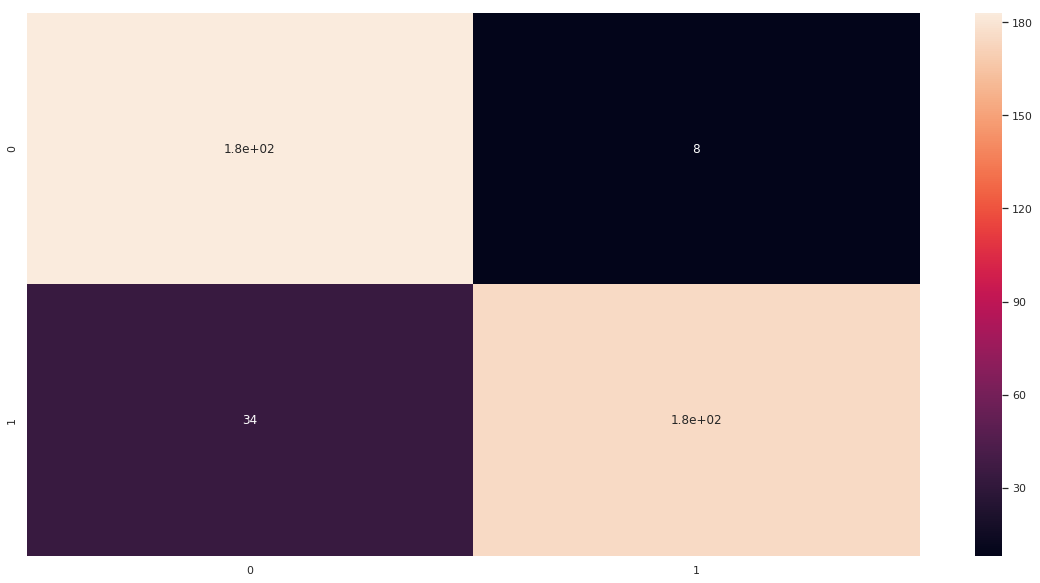

In [ ]:
# heatmap of confusion matrix
sns.heatmap(cf, annot = True)

# 7. Explain Results

88% accuracy means the model is able to predict ad clicks but it can be improved.  
For the confusion matrix, we want the diagonal values to be higher than off diagonal values.   
For the heatmap of confusion matrix, we want the diagonal to be darker than off diagonal.

[Guide to confusion matrices](https://www.dataschool.io/simple-guide-to-confusion-matrix-terminology/)

# 8. Explain Predictions

We can try out our model with new data to see if we can predict that the user will click on the ad or not.

In [ ]:
# Assign test data into new variable
test_data = X_test

# Create column to insert predictions
test_data['predictions'] = y_pred

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [ ]:
# Describe why the
test_data[test_data['predictions']==0].describe()

,Daily Time Spent on Site,Area Income,Age,predictions
count,217.000000,217.000000,217.000000,217.0
mean,75.477005,59816.805853,30.294931,0.0
std,8.870833,10314.410925,4.995889,0.0
min,43.700000,25408.210000,19.000000,0.0
25%,70.580000,54787.370000,27.000000,0.0
50%,76.840000,61608.230000,30.000000,0.0
75%,81.580000,67080.940000,33.000000,0.0
max,90.970000,77460.070000,45.000000,0.0


In [ ]:
test_data[test_data['predictions']==1].describe()

,Daily Time Spent on Site,Area Income,Age,predictions
count,183.000000,183.000000,183.000000,183.0
mean,51.334262,49936.225792,42.857923,1.0
std,11.902787,14468.091209,6.994624,0.0
min,32.600000,14548.060000,28.000000,1.0
25%,41.745000,40585.375000,38.000000,1.0
50%,49.810000,50666.500000,43.000000,1.0
75%,59.435000,61540.355000,49.000000,1.0
max,84.450000,77871.750000,60.000000,1.0


# 9. Predict on New Data

In [ ]:
# Input new data on daily time spent on site, area income and age
new_data = [[300, 10000, 24]]

log_reg.predict(new_data) # 1 means the user will click, 0 means the user won't

array([0])

In [ ]:
another_data = [[10, 1000, 24]]

log_reg.predict(another_data) # 1 means the user will click, 0 means the user won't

array([1])